### Author: Tony Joseph

In [13]:
'''
The Leung-Malik (LM) Filter Bank, implementation in python

T. Leung and J. Malik. Representing and recognizing the visual appearance of
materials using three-dimensional textons. International Journal of Computer
Vision, 43(1):29-44, June 2001.

Reference: http://www.robots.ox.ac.uk/~vgg/research/texclass/filters.html
'''

import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy


def gaussian1d(sigma, mean, x, ord):
    x = np.array(x)
    x_ = x - mean
    var = sigma**2

    # Gaussian Function
    g1 = (1/np.sqrt(2*np.pi*var))*(np.exp((-1*x_*x_)/(2*var)))
    
    if ord == 0:
        g = g1
        return g
    elif ord == 1:
        g = -g1*((x_)/(var))
        return g
    else:
        g = g1*(((x_*x_) - var)/(var**2))
        return g

    
def gaussian2d(sup, scales):
    var = scales * scales
    shape = (sup,sup)
    n,m = [(i - 1)/2 for i in shape]
    x,y = np.ogrid[-m:m+1,-n:n+1]
    g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var) )
    return g


def log2d(sup, scales):
    var = scales * scales
    shape = (sup,sup)
    n,m = [(i - 1)/2 for i in shape]
    x,y = np.ogrid[-m:m+1,-n:n+1]
    g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var) )
    h = g*((x*x + y*y) - var)/(var**2)
    return h


def makefilter(scale, phasex, phasey, pts, sup):

    gx = gaussian1d(3*scale, 0, pts[0,...], phasex)
    gy = gaussian1d(scale,   0, pts[1,...], phasey)

    image = gx*gy

    image = np.reshape(image,(sup,sup))
    return image


def makeLMfilters():
    sup     = 49
    scalex  = np.sqrt(2) * np.array([1,2,3])
    norient = 6
    nrotinv = 12

    nbar  = len(scalex)*norient
    nedge = len(scalex)*norient
    nf    = nbar+nedge+nrotinv
    F     = np.zeros([sup,sup,nf])
    hsup  = (sup - 1)/2

    x = [np.arange(-hsup,hsup+1)]
    y = [np.arange(-hsup,hsup+1)]

    [x,y] = np.meshgrid(x,y)

    orgpts = [x.flatten(), y.flatten()]
    orgpts = np.array(orgpts)
    
    count = 0
    for scale in range(len(scalex)):
        for orient in range(norient):
            angle = (np.pi * orient)/norient
            c = np.cos(angle)
            s = np.sin(angle)
            rotpts = [[c+0,-s+0],[s+0,c+0]]
            rotpts = np.array(rotpts)
            rotpts = np.dot(rotpts,orgpts)
            F[:,:,count] = makefilter(scalex[scale], 0, 1, rotpts, sup)
            F[:,:,count+nedge] = makefilter(scalex[scale], 0, 2, rotpts, sup)
            count = count + 1
            
    count = nbar+nedge
    scales = np.sqrt(2) * np.array([1,2,3,4])
    
    for i in range(len(scales)):
        F[:,:,count]   = gaussian2d(sup, scales[i])
        count = count + 1
        
    for i in range(len(scales)):
        F[:,:,count] = log2d(sup, scales[i])
        count = count + 1
        
    for i in range(len(scales)):
        F[:,:,count] = log2d(sup, 3*scales[i])
        count = count + 1
        
    return F

In [2]:
# %matplotlib inline

In [3]:
# def gaussian1d(sigma, mean, x, ord):
#     x = np.array(x)
#     x_ = x - mean
#     var = sigma**2

#     # Gaussian Function
#     g1 = (1/np.sqrt(2*np.pi*var))*(np.exp((-1*x_*x_)/(2*var)))
    
#     if ord == 0:
#         g = g1
#         return g
#     elif ord == 1:
#         g = -g1*((x_)/(var))
#         return g
#     else:
#         g = g1*(((x_*x_) - var)/(var**2))
#         return g


In [4]:
# def gaussian2d(sup, scales):
#     var = scales * scales
#     shape = (sup,sup)
#     n,m = [(i - 1)/2 for i in shape]
#     x,y = np.ogrid[-m:m+1,-n:n+1]
#     g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var) )
#     return g

In [5]:
# def log2d(sup, scales):
#     var = scales * scales
#     shape = (sup,sup)
#     n,m = [(i - 1)/2 for i in shape]
#     x,y = np.ogrid[-m:m+1,-n:n+1]
#     g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var) )
#     h = g*((x*x + y*y) - var)/(var**2)
#     return h

In [6]:
# def makefilter(scale, phasex, phasey, pts, sup):

#     gx = gaussian1d(3*scale, 0, pts[0,...], phasex)
#     gy = gaussian1d(scale,   0, pts[1,...], phasey)

#     image = gx*gy

#     image = np.reshape(image,(sup,sup))
#     return image

In [7]:
# def makeLMfilters():
#     sup     = 49
#     scalex  = np.sqrt(2) * np.array([1,2,3])
#     norient = 6
#     nrotinv = 12

#     nbar  = len(scalex)*norient
#     nedge = len(scalex)*norient
#     nf    = nbar+nedge+nrotinv
#     F     = np.zeros([sup,sup,nf])
#     hsup  = (sup - 1)/2

#     x = [np.arange(-hsup,hsup+1)]
#     y = [np.arange(-hsup,hsup+1)]

#     [x,y] = np.meshgrid(x,y)

#     orgpts = [x.flatten(), y.flatten()]
#     orgpts = np.array(orgpts)
    
#     count = 0
#     for scale in range(len(scalex)):
#         for orient in range(norient):
#             angle = (np.pi * orient)/norient
#             c = np.cos(angle)
#             s = np.sin(angle)
#             rotpts = [[c+0,-s+0],[s+0,c+0]]
#             rotpts = np.array(rotpts)
#             rotpts = np.dot(rotpts,orgpts)
#             F[:,:,count] = makefilter(scalex[scale], 0, 1, rotpts, sup)
#             F[:,:,count+nedge] = makefilter(scalex[scale], 0, 2, rotpts, sup)
#             count = count + 1
            
#     count = nbar+nedge
#     scales = np.sqrt(2) * np.array([1,2,3,4])
    
#     for i in range(len(scales)):
#         F[:,:,count]   = gaussian2d(sup, scales[i])
#         count = count + 1
        
#     for i in range(len(scales)):
#         F[:,:,count] = log2d(sup, scales[i])
#         count = count + 1
        
#     for i in range(len(scales)):
#         F[:,:,count] = log2d(sup, 3*scales[i])
#         count = count + 1
        
#     return F

In [9]:
# F = makeLMfilters()
# print(F.shape)

(49, 49, 48)


## First order derivative Gaussian Filter

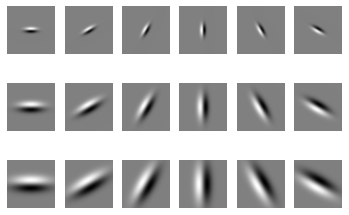

In [10]:
# for i in range(0,18):
#     plt.subplot(3,6,i+1)
#     plt.axis('off')
#     plt.imshow(F[:,:,i], cmap = 'gray')

## Second order derivative Gaussian Filter

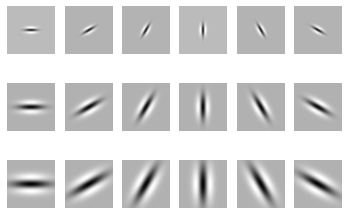

In [11]:
# for i in range(0,18):
#     plt.subplot(3,6,i+1)
#     plt.axis('off')
#     plt.imshow(F[:,:,i+18], cmap = 'gray')

## Gaussian and Laplacian Filter

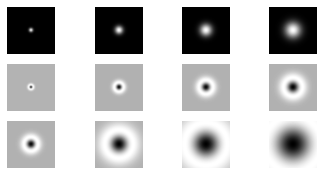

In [12]:
# for i in range(0,12):
#     plt.subplot(4,4,i+1)
#     plt.axis('off')
#     plt.imshow(F[:,:,i+36], cmap = 'gray')